In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pymongo as pm
import numpy as np

In [10]:
port = 24444
host = 'localhost'
connection = pm.MongoClient(port = port, host = host)

In [11]:
coll = connection['imagenet']['alexnet']

In [12]:
q_val = {'exp_id' : 'experiment_1'}
res = coll.find(q_val)

In [13]:
db = connection['imagenet']

In [14]:
db.collection_names()

[u'alexnet.files', u'alexnet.files.test_db.test_coll', u'alexnet.chunks']

In [15]:
db.collection_names()

[u'alexnet.files', u'alexnet.files.test_db.test_coll', u'alexnet.chunks']

In [16]:
coll = db['alexnet.files']

In [17]:
coll.count()

1079

In [28]:
connection.database_names()

[u'imagenet',
 u'imagenet_alexnet_experiment_1___RECENT',
 u'local',
 u'mnist',
 u'tasks',
 u'test_db_sophia',
 u'tfutils-test']

In [36]:
for i in connection.database_names():
    db1 = connection[i]
    print i, db1.collection_names()

imagenet [u'alexnet.files', u'alexnet.files.test_db.test_coll', u'alexnet.chunks']
imagenet_alexnet_experiment_1___RECENT [u'fs.chunks', u'fs.files']
local [u'startup_log']
mnist [u'simple.files', u'simple.chunks']
tasks [u'polyfunction']
test_db_sophia [u'test_coll']
tfutils-test [u'testcol2_dist.files', u'testcol_cust_multi.chunks', u'testcol_multi.chunks', u'testcol2.chunks', u'testcol_cust_dist.chunks', u'testcol_cust_dist_multi.chunks', u'testcol2_multi.files', u'testcol_cust.files', u'testcol_dist.files', u'testcol_cust.chunks', u'testcol_dist.chunks', u'testcol_cust_dist.files', u'testcol.files', u'testcol_dist_multi.files', u'testcol2.files', u'testcol_cust_dist_multi.files', u'testcol2_multi.chunks', u'testcol_dist_multi.chunks', u'testcol_cust_multi.files', u'testcol_multi.files', u'testcol.chunks', u'testcol2_dist.chunks']


In [29]:
db1 = connection['imagenet']

In [20]:
db1.collection_names()

[u'alexnet.files', u'alexnet.files.test_db.test_coll', u'alexnet.chunks']

In [21]:
doc = db1['alexnet.files'].find()[446]

In [22]:
doc.keys()

[u'validates',
 u'saved_filters',
 u'step',
 u'params',
 u'duration',
 u'exp_id',
 u'_id',
 u'validation_results']

In [30]:
doc['exp_id']

u'experiment_1'

In [23]:
conv1_kernel = doc['validation_results']['valid0']['conv1_kernel']

In [24]:
conv1_kernel = np.array(conv1_kernel)

In [25]:
conv1_kernel.shape

(11, 11, 3, 96)

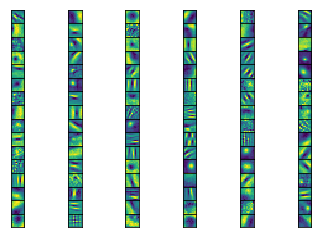

In [85]:
f, axarr = plt.subplots(16, 6)
for i in range(16):
    for j in range(6):
        axarr[i,j].imshow(conv1_kernel[:,:,0,i*6 + j])
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0)

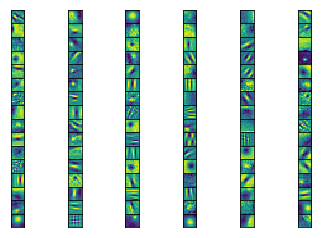

In [86]:
f, axarr = plt.subplots(16, 6)
for i in range(16):
    for j in range(6):
        axarr[i,j].imshow(conv1_kernel[:,:,1,i*6 + j])
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0)

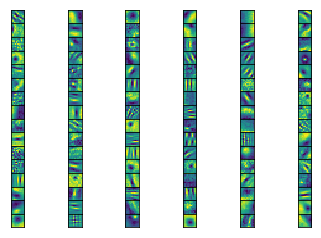

In [87]:
f, axarr = plt.subplots(16, 6)
for i in range(16):
    for j in range(6):
        axarr[i,j].imshow(conv1_kernel[:,:,2,i*6 + j])
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0)

In [88]:
doc['validation_results']['valid0'].keys()

[u'rdm_pool1',
 u'rdm_pool2',
 u'it_regression_conv3',
 u'spearman_corrcoef_pool5',
 u'categorization_pool2',
 u'categorization_pool1',
 u'it_regression_pool1',
 u'it_regression_pool2',
 u'it_regression_conv5',
 u'categorization_conv3',
 u'categorization_conv4',
 u'categorization_conv5',
 u'rdm_fc8',
 u'spearman_corrcoef_pool1',
 u'it_regression_pool5',
 u'spearman_corrcoef_pool2',
 u'rdm_fc6',
 u'rdm_fc7',
 u'rdm_pool5',
 u'spearman_corrcoef_conv3',
 u'spearman_corrcoef_conv5',
 u'spearman_corrcoef_conv4',
 u'categorization_fc8',
 u'it_regression_fc8',
 u'rdm_it',
 u'it_regression_fc6',
 u'it_regression_fc7',
 u'categorization_fc7',
 u'categorization_fc6',
 u'conv1_kernel',
 u'categorization_pool5',
 u'spearman_corrcoef_fc8',
 u'it_regression_conv4',
 u'spearman_corrcoef_fc6',
 u'spearman_corrcoef_fc7',
 u'rdm_conv3',
 u'rdm_conv5',
 u'rdm_conv4']

In [91]:
rdm_fc8 = doc['validation_results']['valid0']['rdm_fc8']

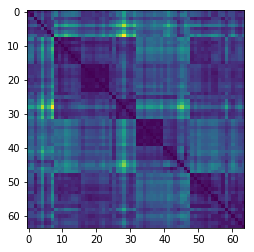

In [92]:
plt.imshow(rdm_fc8)

In [95]:
categorization_pool5 = doc['validation_results']['valid0']['categorization_pool5']

In [99]:
cms = np.array(categorization_pool5['result_summary']['cms'])

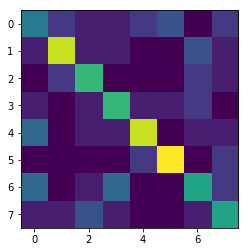

In [101]:
plt.imshow(cms[:,:,0])